<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Para desenvolver um modelo de Aprendizado de Máquina com o conjunto de dados CIFAR-10, você pode seguir os seguintes passos:

1. Importe as bibliotecas necessárias, incluindo TensorFlow, Keras e o conjunto de dados CIFAR-10.

2. Carregue o conjunto de dados CIFAR-10 usando a função load_data() do Keras. Isso fornecerá as imagens de treinamento e teste, bem como suas respectivas etiquetas.

3. Pré-processe os dados convertendo as imagens em tensores e normalizando-os para valores entre 0 e 1.

4. Defina a arquitetura do modelo. Você pode usar uma variedade de camadas, como convolucionais, de pooling e totalmente conectadas, para construir seu modelo. Certifique-se de usar camadas de dropout para ajudar a prevenir o overfitting.

5. Compile o modelo, definindo a função de perda, o otimizador e as métricas de avaliação.

6. Treine o modelo usando o método fit() do Keras, passando as imagens de treinamento e suas etiquetas correspondentes.

7. Avalie o desempenho do modelo em um conjunto de dados de teste separado, usando o método evaluate().

8. Faça previsões usando o método predict() do modelo em novos dados.

### 1. Import librarys

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
print(tf.__version__)

2.12.0


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-04-04 00:32:20.630433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-04 00:32:20.651068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-04 00:32:20.651231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### 2. Load data


In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 3. Normalizing

In [ ]:
# normalizing the data between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (50000, 32, 32, 3)


In [ ]:
y_train, y_test = y_train.flatten(), y_test.flatten()
print("y_train.shape:", y_train.shape)

y_train.shape: (50000,)


In [ ]:
k = len(set(y_train))
print("number of classes:", k)

number of classes: 10


### 4. Build and compile the model

The code will define a Convolutional Neural Network (CNN) model to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The goal of the model is to take an image as input and output a probability distribution over the 10 classes.


In [ ]:
# Let's go through the code step by step:

# Define a new input with the same shape as a single image in the CIFAR-10 dataset
i = Input(shape=x_train[0].shape)
''' Here, the Input function from the Keras library is used to create a placeholder for the input images to the model.
The shape argument is set to the shape of the first image in the training dataset (x_train[0].shape).
This creates a placeholder of the appropriate size to handle any image in the dataset.'''

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and a stride of 2
# The ReLU activation function is used to introduce non-linearity
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
''' This line of code defines the first convolutional layer of the model. 
Conv2D is a function from the Keras library that creates a convolutional layer
with the specified number of filters (in this case, 32), a 3x3 kernel size, and a stride of 2. 
The activation argument is set to 'relu', which stands for rectified linear unit. 
This activation function introduces non-linearity into the model, 
allowing it to learn more complex patterns in the input data.'''

x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
''' This line defines the second convolutional layer of the model, 
using the output tensor x from the previous convolutional layer as its input.'''

x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
''' This line defines the third convolutional layer of the model, 
using the output tensor x from the previous convolutional layer as its input.'''

# Flatten the output of the convolutional layers to a 1D tensor
x = Flatten()(x)
'''This line flattens the output tensor of the third convolutional layer into a 1D vector.
This is necessary because the fully connected dense layers of the model require a 1D input.'''

# Apply dropout regularization to the 1D tensor to prevent overfitting
# A dropout rate of 0.2 is used, meaning that 20% of the nodes will be randomly set to 0 during each training iteration
x = Dropout(0.2)(x)

# Add a fully connected dense layer with 512 units and a ReLU activation function
# The output tensor x from the previous layer is used as input to this layer.
x = Dense(512, activation='relu')(x)

# Apply dropout regularization to the output of the dense layer
x = Dropout(0.2)(x)

# Add a final dense layer with k units and a softmax activation function, where k is the number of classes in the dataset
x = Dense(k, activation='softmax')(x)
'''The k value is set to 10, which is the number of classes in the CIFAR-10 dataset. 
The softmax activation function outputs a probability distribution over the classes, 
with each value in the output vector representing the probability that the input image belongs to that class.'''

# Define a new model with the input and output tensors
model = Model(i, x)
'''This line creates the final Keras Model object by specifying the input and output tensors of the model.
i is the input tensor and x is the output tensor.
This object can then be used to train and evaluate the model on the CIFAR-10 dataset, 
using functions such as model.compile(), model.fit(), and model.evaluate().'''

2023-04-04 00:32:26.062682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-04 00:32:26.062940: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-04 00:32:26.063297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

'This line creates the final Keras Model object by specifying the input and output tensors of the model.\ni is the input tensor and x is the output tensor.\nThis object can then be used to train and evaluate the model on the CIFAR-10 dataset, \nusing functions such as model.compile(), model.fit(), and model.evaluate().'

### 5. Compile

In [ ]:
# compile defining the loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 6. Train the model

In [ ]:
# define the optimizer with the new learning rate
opt = Adam(learning_rate=0.001)

# compile defining the loss function, optimizer, and metrics
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10, # randomly rotate images by up to 10 degrees
    width_shift_range=0.1, # randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # randomly shift images vertically by up to 10%
    horizontal_flip=True,
    shear_range=0.1, # image will be distorted along an axis, so that computers can see how humans see things from different angles
    zoom_range=0.1, # randomly zoom in by 10%
    fill_mode='nearest' # fill in missing pixels with the nearest value
  )

# prepare iterator with augmention options
train_iterator = datagen.flow(x_train, y_train, batch_size=32)

# fit the model on the batches generated by datagen.flow()
r = model.fit(train_iterator, validation_data=(x_test, y_test), steps_per_epoch=len(x_train) / 32, epochs=15)

Epoch 1/15


2023-04-04 00:32:45.677440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-04-04 00:32:47.139625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8801
2023-04-04 00:32:47.714418: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-04 00:32:48.281106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-04 00:32:48.282404: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f7eb9269a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-04 00:32:48.282417: I tensorflo

1562/1562 [==============================] - 16s 8ms/step - loss: 1.6446 - accuracy: 0.3972 - val_loss: 1.3567 - val_accuracy: 0.5048
Epoch 2/15
1562/1562 [==============================] - 12s 8ms/step - loss: 1.3727 - accuracy: 0.5036 - val_loss: 1.2056 - val_accuracy: 0.5643
Epoch 3/15
1562/1562 [==============================] - 12s 8ms/step - loss: 1.2617 - accuracy: 0.5458 - val_loss: 1.1240 - val_accuracy: 0.5937
Epoch 4/15
1562/1562 [==============================] - 12s 8ms/step - loss: 1.1774 - accuracy: 0.5781 - val_loss: 1.0235 - val_accuracy: 0.6358
Epoch 5/15
1562/1562 [==============================] - 12s 8ms/step - loss: 1.1238 - accuracy: 0.5988 - val_loss: 1.0111 - val_accuracy: 0.6459
Epoch 6/15
1562/1562 [==============================] - 12s 8ms/step - loss: 1.0739 - accuracy: 0.6188 - val_loss: 0.9785 - val_accuracy: 0.6606
Epoch 7/15
1562/1562 [==============================] - 13s 8ms/step - loss: 1.0380 - accuracy: 0.6336 - val_loss: 0.9179 - val_accuracy: 0.6

### 7. Evaluate the model

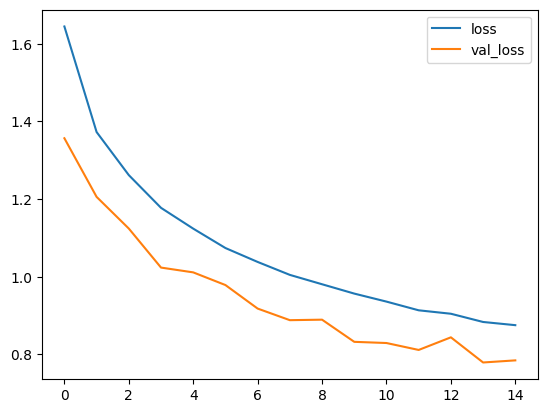

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

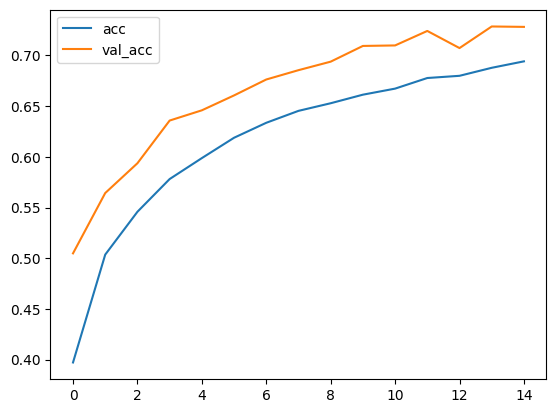

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 957us/step - loss: 0.7844 - accuracy: 0.7282
[0.7844277620315552, 0.7282000184059143]


### Labels

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_indices = np.unique(y_train).tolist()
class_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
class_names = [f'{labels[i]} ({class_indices[i]})' for i in range(len(class_indices))]
print(class_names)

['airplane (0)', 'automobile (1)', 'bird (2)', 'cat (3)', 'deer (4)', 'dog (5)', 'frog (6)', 'horse (7)', 'ship (8)', 'truck (9)']


### Confusion matrix

In [ ]:
# predict the test data
p_test = model.predict(x_test).argmax(axis=1)

# confusion matrix
cm = confusion_matrix(y_test, p_test)
print(cm)

313/313 [==============================] - 0s 739us/step
[[802  32  16  16  10   5  10  14  49  46]
 [  2 917   2   4   2   0   3   4   9  57]
 [ 88  13 485  72  96  66 105  45  16  14]
 [ 21  15  35 512  59 139 127  38  22  32]
 [ 29   4  33  43 666  23  84 106   7   5]
 [ 16   7  25 173  54 591  53  54  12  15]
 [  4   9  15  40  27  15 871   5   6   8]
 [ 17   7   9  29  27  44  12 825   5  25]
 [ 70  44   5  14   7   1   8   8 803  40]
 [ 25 120   4   6   3   4   8  11   9 810]]


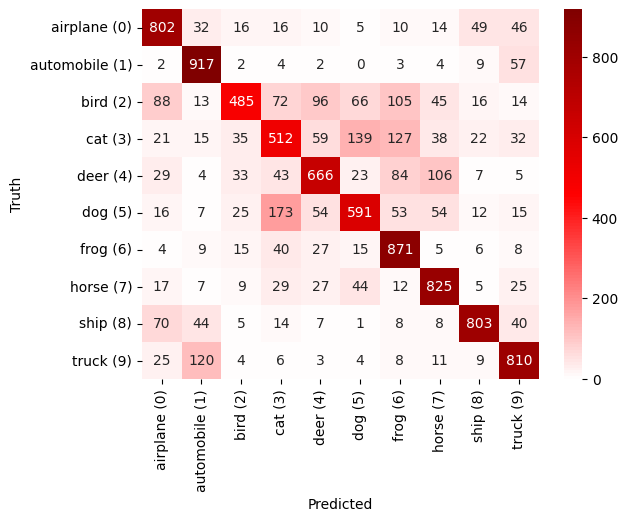

In [ ]:
# plot the confusion matrix with seaborn
# plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='seismic', center=0, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

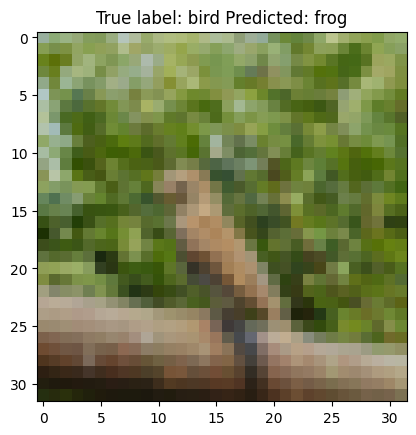

In [ ]:
# show some misclassidied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));